Enter the origin:  ost
Enter the destination:  hbf
Enter the travel time from ost to hbf (in minutes):  25


Terminal time at hbf: 3 minutes


Enter the headway (time interval between successive vehicles in minutes):  10
Enter the departure date (YYYY-MM-DD):  2024-01-01
Enter the start time for the schedule (HH:MM):  05:30
Enter the end time for the schedule (HH:MM):  20:30



Initial number of vehicles: 5.60
Adjusted number of vehicles: 6
Initial cycle time: 56 minutes
Adjusted cycle time: 60 minutes
Schedule efficiency: 93.33%


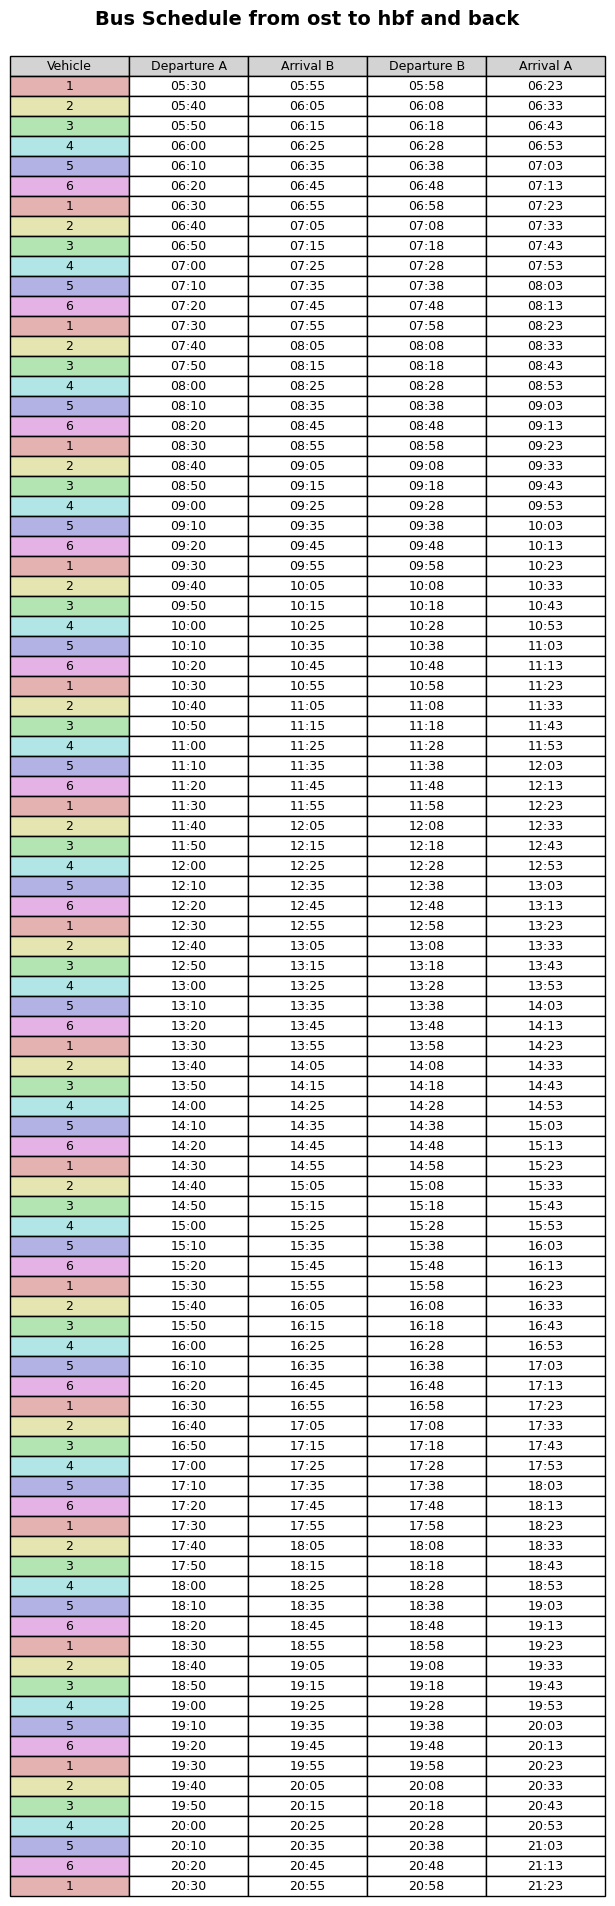

In [7]:
import math
from datetime import datetime, timedelta
import matplotlib.pyplot as plt  # Importing Matplotlib for plotting
import matplotlib.colors as mcolors
import colorsys

from matplotlib.animation import adjusted_figsize


def get_time_input(prompt):
    """To ensure the time input is in HH:MM format."""
    while True:
        time_str = input(prompt)
        try:
            return datetime.strptime(time_str, '%H:%M').time()
        except ValueError:
            print("Invalid time format. Please use HH:MM.")


def get_date_input(prompt):
    """To ensure the date input is in YYYY-MM-DD format."""
    while True:
        date_str = input(prompt)
        try:
            return datetime.strptime(date_str, '%Y-%m-%d').date()
        except ValueError:
            print("Invalid date format. Please use YYYY-MM-DD.")


def vehicle_identification(num_colors):
    colors = []
    for i in range(num_colors):
        hue = i / num_colors
        saturation = 0.5
        value = 0.8
        rgb = colorsys.hsv_to_rgb(hue, saturation, value)
        color = mcolors.to_rgba(rgb, alpha=0.5)
        colors.append(color)
    return colors


def main():
    # Input for origin and destination
    origin = input("Enter the origin: ")
    destination = input("Enter the destination: ")

    # Input for travel time (in minutes)
    travel_time = int(input(f"Enter the travel time from {origin} to {destination} (in minutes): "))

    # Input for terminal time (in minutes)
    terminal_time = int(0.15 * travel_time)
    print(f"Terminal time at {destination}: {terminal_time} minutes")

    # Input for headway (time interval between successive vehicles in minutes)
    headway = int(input("Enter the headway (time interval between successive vehicles in minutes): "))

    # Get user input for departure date and start time
    departure_date = get_date_input("Enter the departure date (YYYY-MM-DD): ")
    start_time = get_time_input("Enter the start time for the schedule (HH:MM): ")

    # Calculate end time based on user input
    end_time = get_time_input("Enter the end time for the schedule (HH:MM): ")

    # Combine date and start time into a single datetime object
    current_departure_a = datetime.combine(departure_date, start_time)

    # Convert end_time to a datetime object for comparison
    end_datetime = datetime.combine(departure_date, end_time)

    # Calculate total cycle time
    total_cycle_time = 2 * (travel_time + terminal_time)

    # Calculate number of vehicles needed
    num_vehicles = total_cycle_time / headway
    if num_vehicles % 1 != 0:  # If not an integer
        adjusted_num_vehicles = math.ceil(num_vehicles)  # Round up to next integer

        # Calculate adjusted cycle time
        adjusted_cycle_time = adjusted_num_vehicles * headway

        print(f"\nInitial number of vehicles: {num_vehicles:.2f}")
        print(f"Adjusted number of vehicles: {adjusted_num_vehicles}")
        print(f"Initial cycle time: {total_cycle_time} minutes")
        print(f"Adjusted cycle time: {adjusted_cycle_time} minutes")
    else:
        adjusted_num_vehicles = int(num_vehicles)
        adjusted_cycle_time = total_cycle_time

        print(f"\nNumber of vehicles: {adjusted_num_vehicles}")
        print(f"Cycle time: {total_cycle_time} minutes")

    # If end_time is earlier than start_time, set it to the next day
    if end_datetime < current_departure_a:
        end_datetime += timedelta(days=1)

    efficiency = (total_cycle_time / adjusted_cycle_time) * 100
    print(f"Schedule efficiency: {efficiency:.2f}%")

    # Create schedule table
    vehicle_colors = vehicle_identification(adjusted_num_vehicles)
    schedule_data = []

    vehicle_index = 0
    while current_departure_a <= end_datetime:
        # Calculate times based on current departure
        arrival_b = current_departure_a + timedelta(minutes=travel_time)  # Arrival at B
        departure_b = arrival_b + timedelta(minutes=terminal_time)  # Departure from B
        arrival_a = departure_b + timedelta(minutes=travel_time)  # Arrival at A

        # Append calculated times to schedule data
        schedule_data.append([
            vehicle_index +1, # Use integer for vehicle number
            current_departure_a.strftime('%H:%M'),
            arrival_b.strftime('%H:%M'),
            departure_b.strftime('%H:%M'),
            arrival_a.strftime('%H:%M')
        ])

        vehicle_index = (vehicle_index + 1) % adjusted_num_vehicles
        # Update departure time for the next vehicle using headway only
        current_departure_a += timedelta(minutes=headway)

    # Create a table using Matplotlib
    fig, ax = plt.subplots()

    # Hide axes
    ax.axis('tight')
    ax.axis('off')

    # Create table with headers and data
    table_data = [["Vehicle","Departure A", "Arrival B", "Departure B", "Arrival A"]] + schedule_data
    cell_colors = [['lightgray'] * 5]  # Header row color
    for row in schedule_data:
        row_colors = [vehicle_colors[int(row[0] - 1)]] + ['white'] * 4

        cell_colors.append(row_colors)

    table = ax.table(cellText=table_data, cellLoc='center', loc='center', cellColours=cell_colors)
    plt.title(f"Bus Schedule from {origin} to {destination} and back", fontsize=14, fontweight='bold', pad=20, y=3)

    table.auto_set_font_size(False)
    table.set_fontsize(9)
    table.scale(1.2, 1.2)

    # Display the table
    plt.show()


if __name__ == "__main__":
    main()
